# Perform PCA of treatment naive samples ConsensusTME NES

Script related to figure 3c, s3e-f

### Aim:
- See how ConsensusTME NES cluster across patients

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load ssGSEA results

In [9]:
file_nes = home + 'Data/3/ConsensusTME_TreatmentNaive_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [10]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
B_cells,0.038479,0.154999,0.131586,0.088623,0.038772,-0.017512,-0.047078,-0.086647,-0.199374,-0.054448,...,0.012504,0.114890,-0.036248,0.016278,-0.012882,0.144749,0.120451,0.104527,0.083152,-0.065881
Cytotoxic_cells,0.210148,0.187567,0.153687,-0.144163,0.003858,-0.155173,-0.290251,-0.170454,-0.416859,-0.319623,...,-0.345901,-0.250878,-0.304831,-0.221868,-0.305614,-0.003971,-0.002669,-0.075072,-0.086188,-0.243335
Dendritic_cells,0.189096,0.226787,0.275280,0.044318,0.094001,0.092652,-0.010609,0.014540,-0.053804,-0.020696,...,0.024979,0.133931,0.030942,0.075847,0.023800,0.168763,0.151665,0.143299,0.211832,0.002961
Endothelial,0.157806,0.163239,0.208535,0.016865,0.032350,0.052494,-0.086343,0.001588,-0.045086,-0.030739,...,0.037816,0.161829,0.084950,0.095482,-0.077438,0.132625,0.166421,0.091700,0.119399,-0.119859
Eosinophils,0.200823,0.197690,0.271950,-0.022362,0.083034,0.079010,-0.055555,-0.011277,-0.048784,-0.128144,...,0.029711,0.080649,-0.048187,0.134062,0.032138,0.166387,0.158940,0.207949,0.205483,-0.054183


### Check empty cells

In [11]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [12]:
mRNA_tumcell_file = home + 'Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [13]:
mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


### Add mRNA tumour cellularity to NES dataframe

In [14]:
data_nes_t = data_nes.T 

#### Multiply tumour cellularity times a small number to reduce it's impact in the PCA

In [15]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [16]:
data_nes = data_nes_t.T

In [17]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
T_cells_CD4,-0.042384,0.050694,0.004308,-0.207399,-0.165377,-0.208819,-0.255628,-0.257014,-0.333821,-0.314090,...,-0.263731,-0.148920,-0.276321,-0.170624,-0.266695,0.002644,-0.044748,-0.136003,-0.058358,-0.254172
T_cells_CD8,-0.017664,0.060364,-0.000962,-0.153047,-0.133178,-0.183371,-0.250569,-0.248262,-0.325777,-0.280394,...,-0.250714,-0.179655,-0.287451,-0.188185,-0.219502,0.002935,-0.005583,-0.084019,-0.045147,-0.269410
T_cells_gamma_delta,-0.038414,0.052337,-0.005596,-0.151517,-0.140392,-0.208642,-0.297564,-0.266138,-0.367513,-0.289465,...,-0.346152,-0.189331,-0.311887,-0.237372,-0.251334,-0.058035,-0.047690,-0.156334,-0.051404,-0.335890
T_regulatory_cells,-0.108068,0.054963,-0.088210,-0.117862,-0.184319,-0.183183,-0.213260,-0.254521,-0.324164,-0.332699,...,-0.290274,-0.119889,-0.306815,-0.224312,-0.232095,0.037718,-0.043270,-0.188168,-0.111135,-0.293895
TumourCellularity_mRNA,0.000073,0.000067,0.000066,0.000083,0.000080,0.000082,0.000090,0.000087,0.000089,0.000090,...,0.000080,0.000069,0.000078,0.000076,0.000082,0.000068,0.000064,0.000070,0.000065,0.000087


### Visulase NES

#### Samples

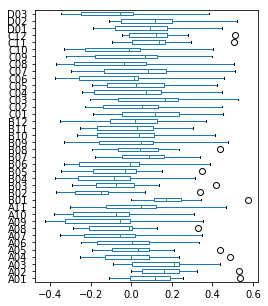

In [18]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

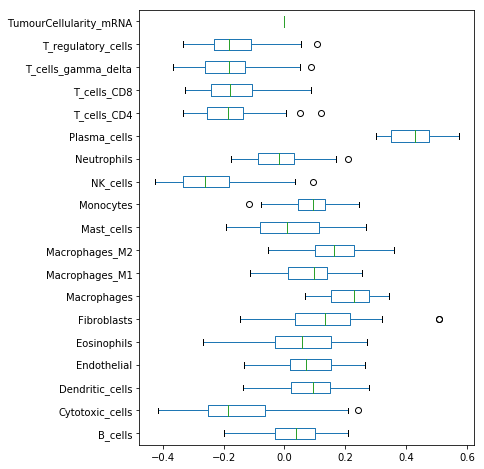

In [19]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate PCA

In [20]:
pca = PCA(n_components=7)

In [21]:
pca_nes = pca.fit_transform(data_nes.transpose())

In [22]:
len(pca_nes) # check number of data points

38

#### Get PCA loadings

In [23]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.73060504, 0.10793798, 0.04648462, 0.03401486, 0.02050022,
       0.01702731, 0.01237222])

## Plot PCA

### Create custom colormaps (a.k.a. cmaps)

In [24]:
def make_cmap(colors, position=None, bit=False):
    
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    return cmap

### Convert hex to rgb colour

In [25]:
def hex_to_rgb(value):
    
    '''Return (red, green, blue) for the color given as #rrggbb.'''
    
    value = value.lstrip('#')
    lv = len(value)
    
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

### Define cmaps for patient kernel densities

In [26]:
white = (255,255,255)

reds    = make_cmap([white, hex_to_rgb('#e41a1c')], bit=True)
blues   = make_cmap([white, hex_to_rgb('#377eb8')], bit=True)
greens  = make_cmap([white, hex_to_rgb('#4eae4b')], bit=True)
purples = make_cmap([white, hex_to_rgb('#994fa1')], bit=True)
oranges = make_cmap([white, hex_to_rgb('#ff8101')], bit=True)
yellows = make_cmap([white, hex_to_rgb('#fdfc33')], bit=True)
browns  = make_cmap([white, hex_to_rgb('#a8572c')], bit=True)
pinks   = make_cmap([white, hex_to_rgb('#f482be')], bit=True)

reds_r    = make_cmap([hex_to_rgb('#e41a1c'), white], bit=True)
blues_r   = make_cmap([hex_to_rgb('#377eb8'), white], bit=True)
greens_r  = make_cmap([hex_to_rgb('#4eae4b'), white], bit=True)
purples_r = make_cmap([hex_to_rgb('#994fa1'), white], bit=True)
oranges_r = make_cmap([hex_to_rgb('#ff8101'), white], bit=True)
yellows_r = make_cmap([hex_to_rgb('#fdfc33'), white], bit=True)
browns_r  = make_cmap([hex_to_rgb('#a8572c'), white], bit=True)
pinks_r   = make_cmap([hex_to_rgb('#f482be'), white], bit=True)

### Colour-sample correspondence

In [27]:
color_case_d = {1:reds,
                4:blues,
                5:greens,
                6:purples,
                10:oranges,
                13:yellows,
                16:browns,
                17:pinks}

color_case_dr = {1:reds_r,
                 4:blues_r,
                 5:greens_r,
                 6:purples_r,
                 10:oranges_r,
                 13:yellows_r,
                 16:browns_r,
                 17:pinks_r}

### Plot PCA

In [34]:
pcx=1
pcy=2

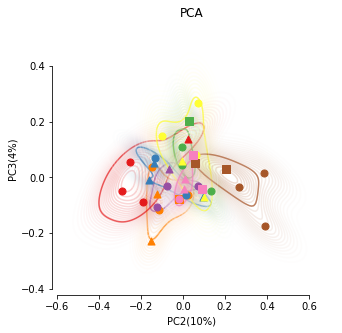

In [35]:
fig = plt.figure(figsize=(5, 5))

plt.title('PCA')

d_kde = {}
for i in range(len(pca_nes[:, 0])):
    
    plt.scatter(pca_nes[:,pcx][i],
                pca_nes[:,pcy][i],
                c=list(sample_labels['Colour'])[i],
                edgecolors=list(sample_labels['Colour'])[i],
                marker=list(sample_labels['Site_marker'])[i],
                zorder=1,
                lw=1,
                s=50)
    
    if list(sample_labels['Case_mRNA'])[i] not in d_kde:
        
        d_kde[list(sample_labels['Case_mRNA'])[i]] = {'x':[pca_nes[:,pcx][i]],
                                                      'y':[pca_nes[:,pcy][i]]}
    else:
        
        d_kde[list(sample_labels['Case_mRNA'])[i]]['x'].append(pca_nes[:,pcx][i])
        d_kde[list(sample_labels['Case_mRNA'])[i]]['y'].append(pca_nes[:,pcy][i])
      
for j in d_kde:

    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=color_case_d[j],
                n_levels=27,
                alpha=.2,
                zorder=0,
                cut=3)
   
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']), 
                cmap=color_case_dr[j],
                n_levels=1,
                alpha=.7,
                zorder=0,
                cut=3)

xlabel = 'PC%i(%i%s)' % (pcx+1,var_exp[pcx]*100,'%')
ylabel = 'PC%i(%i%s)' % (pcy+1,var_exp[pcy]*100,'%')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
sns.despine(trim=True)

### Save plot

In [36]:
FILE = '../../Figures/main/3/panels/3c_TreatmentNaive_ConsensusTME_PCA_%s_%s.pdf' % (pcx,pcy)

fig.savefig(FILE, bbox='tight')

### Plot PCA loadings

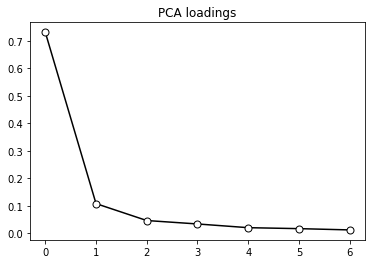

In [31]:
fig = plt.figure()

plt.title('PCA loadings')

plt.plot(var_exp, 'o', mfc='w', c='k', zorder=2, ms=7)
plt.plot(var_exp, '-', c='k', zorder=1)

In [32]:
var_exp

array([0.73060504, 0.10793798, 0.04648462, 0.03401486, 0.02050022,
       0.01702731, 0.01237222])

### Save plot

In [33]:
FILE = "../../Figures/supplementary/3/panels/s3e_TreatmentNaive_ConsensusTME_PCA_loadings.pdf"

fig.savefig(FILE, bbox='tight')

# End script